In [1]:
#### k-means clustering ####

In [2]:
data <-read.csv("Data/Wholesale customers data.csv",header=T)
summary(data)

    Channel          Region          Fresh             Milk      
 Min.   :1.000   Min.   :1.000   Min.   :     3   Min.   :   55  
 1st Qu.:1.000   1st Qu.:2.000   1st Qu.:  3128   1st Qu.: 1533  
 Median :1.000   Median :3.000   Median :  8504   Median : 3627  
 Mean   :1.323   Mean   :2.543   Mean   : 12000   Mean   : 5796  
 3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.: 16934   3rd Qu.: 7190  
 Max.   :2.000   Max.   :3.000   Max.   :112151   Max.   :73498  
    Grocery          Frozen        Detergents_Paper    Delicassen     
 Min.   :    3   Min.   :   25.0   Min.   :    3.0   Min.   :    3.0  
 1st Qu.: 2153   1st Qu.:  742.2   1st Qu.:  256.8   1st Qu.:  408.2  
 Median : 4756   Median : 1526.0   Median :  816.5   Median :  965.5  
 Mean   : 7951   Mean   : 3071.9   Mean   : 2881.5   Mean   : 1524.9  
 3rd Qu.:10656   3rd Qu.: 3554.2   3rd Qu.: 3922.0   3rd Qu.: 1820.2  
 Max.   :92780   Max.   :60869.0   Max.   :40827.0   Max.   :47943.0  

In [3]:
top.n.custs <- function (data,cols,n=5) { #Requires some data frame and the top N to remove
    idx.to.remove <-integer(0) #Initialize a vector to hold customers being removed
    for (c in cols){ # For every column in the data we passed to this function
        col.order <-order(data[,c],decreasing=T) #Sort column "c" in descending order (bigger on top)
        #Order returns the sorted index (e.g. row 15, 3, 7, 1, ...) rather than the actual values sorted.
        idx <-head(col.order, n) #Take the first n of the sorted column C to
        idx.to.remove <-union(idx.to.remove,idx) #Combine and de-duplicate the row ids that need to be removed
    }
    return(idx.to.remove) #Return the indexes of customers to be removed
}

top.custs <-top.n.custs(data,cols=3:8,n=5)
length(top.custs) #How Many Customers to be Removed?
data[top.custs,] #Examine the customers
data.rm.top<-data[-c(top.custs),] #Remove the Customers

[1] 19

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
182,1,3,112151,29627,18148,16745,4948,8550
126,1,3,76237,3473,7102,16538,778,918
285,1,3,68951,4411,12609,8692,751,2406
40,1,3,56159,555,902,10002,212,2916
259,1,1,56083,4563,2124,6422,730,3321
87,2,3,22925,73498,32114,987,20070,903
48,2,3,44466,54259,55571,7782,24171,6465
86,2,3,16117,46197,92780,1026,40827,2944
184,1,3,36847,43950,20170,36534,239,47943
62,2,3,35942,38369,59598,3254,26701,2017


In [4]:
set.seed(76964057) #Set the seed for reproducibility
k <-kmeans(data.rm.top[,-c(1,2)], centers=5) #Create 5 clusters, Remove columns 1 and 2
k$centers #Display&nbsp;cluster centers
table(k$cluster) #Give a count of data points in each cluster

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
1,4189.747,7645.639,11015.277,1335.145,4750.4819,1387.1205
2,16470.870,3026.491,4264.741,3217.306,996.5556,1319.7593
3,33120.163,4896.977,5579.860,3823.372,945.4651,1620.1860
4,5830.214,15295.048,23449.167,1936.452,10361.6429,1912.7381
5,5043.434,2329.683,2786.138,2689.814,652.8276,849.8414



  1   2   3   4   5 
 83 108  43  42 145 

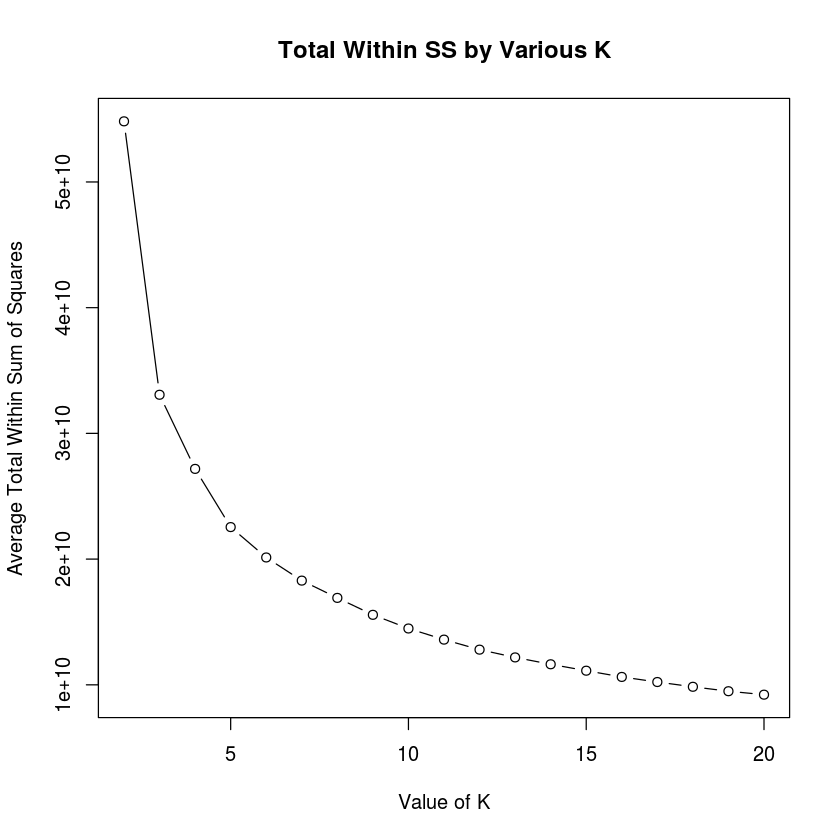

In [5]:
rng<-2:20 #K from 2 to 20
tries <-100 #Run the K Means algorithm 100 times
avg.totw.ss <-integer(length(rng)) #Set up an empty vector to hold all of points
for(v in rng){ # For each value of the range variable
 v.totw.ss <-integer(tries) #Set up an empty vector to hold the 100 tries
 for(i in 1:tries){
     k.temp <-kmeans(data.rm.top,centers=v) #Run kmeans
     v.totw.ss[i] <-k.temp$tot.withinss#Store the total withinss
 }
 avg.totw.ss[v-1] <-mean(v.totw.ss) #Average the 100 total withinss
}
plot(rng,avg.totw.ss,type="b", main="Total Within SS by Various K",
 ylab="Average Total Within Sum of Squares",
 xlab="Value of K")